In [16]:
!pip install chart_studio

You are using pip version 19.0.3, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import plotly
import plotly.graph_objects as go
from PIL import Image
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
fig = plt.figure()
pitch = Pitch(pitch_type='tracab', pitch_length=105, pitch_width=68, label=False,
             pitch_color='grass', line_color='white', stripe=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(18, 9))
plt.savefig('pitch.png', format='png', bbox_inches='tight', pad_inches=0)

<Figure size 432x288 with 0 Axes>

In [2]:
data = pd.read_csv('C:/Users/sebks/Documents/HSLU/MA/data/multiple_events.csv')
#data = data.iloc[:,1:-1]

In [3]:
# convert x and y values to new coordinate system
data['x'] = data['x'] + 52.5
data['y'] = data['y'] + 34

In [4]:
#pl2 = data[data['player_id'] == 3]
data

timestamp  team  jersey_number       x      y  speed  \
0    2019-06-05T20:45:09.000+0100     1              3   82.17  53.86   1.55   
1    2019-06-05T20:45:09.040+0100     1              3   82.07  53.86   1.75   
2    2019-06-05T20:45:09.080+0100     1              3   81.97  53.86   1.95   
3    2019-06-05T20:45:09.120+0100     1              3   81.88  53.84   2.11   
4    2019-06-05T20:45:09.160+0100     1              3   81.78  53.83   2.22   
..                            ...   ...            ...     ...    ...    ...   
393  2019-06-05T20:46:03.360+0100     1              3  111.19  57.39   4.01   
394  2019-06-05T20:46:03.400+0100     1              3  111.28  57.43   4.01   
395  2019-06-05T20:46:03.440+0100     1              3  111.37  57.49   3.94   
396  2019-06-05T20:46:03.480+0100     1              3  111.45  57.55   3.78   
397  2019-06-05T20:46:03.520+0100     1              3  111.53  57.61   3.57   

     speedzone      dist  player_id  acc_actual  acc_event  start_event  
0            1  0.100000          4    0.691667     0.1075            1  
1            1  0.100000          4    0.775000     0.2575            0  
2            1  0.100000          4    0.666667     0.3425            0  
3            1  0.092195          4    0.600000     0.3925            0  
4            1  0.100499          4    0.466667     0.4325            0  
..         ...       ...        ...         ...        ...          ...  
393          3  0.106301          4    0.008333     0.3675            0  
394          3  0.098489          4    0.008333     0.2900            0  
395          3  0.108167          4    0.000000     0.2425            0  
396          2  0.100000          4   -0.058333     0.1475            0  
397          2  0.100000          4   -0.191667     0.0200            0  

[398 rows x 12 columns]

In [5]:
TIME_FORMAT = '%Y-%m-%d''T''%H:%M:%S.%f%z'
data.loc[:, 'timestamp'] = pd.to_datetime(data.loc[:, 'timestamp'], format=TIME_FORMAT)
# get time difference between tracking data. Difference greater than 0.04 means new events is occuring
data['diff'] = data['timestamp'].diff().dt.total_seconds()
# get index of data whith a different time difference than 0.04
event_idx = list(data.index[data['diff'] != 0.04])
event_list = []
for i in range(len(event_idx)-1):
    df = data.iloc[event_idx[i]:event_idx[i+1], :]
    event_list.append(df)

In [6]:
len(event_list)

3


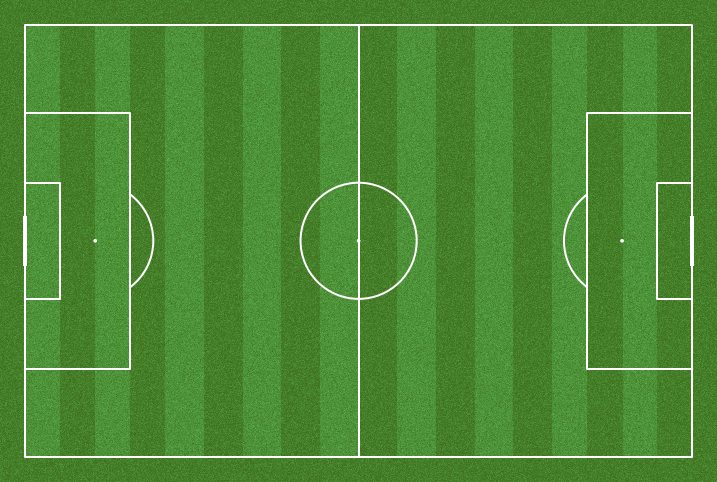

In [7]:
img = Image.open('pitch.png')
fig = go.Figure()

colors = ['lawngreen', 'green', 'yellow', 'orange', 'red']
for df in event_list:
    for i in range(1,6):
        fig.add_scattergl(x=df.x, y=df.y.where(df.speedzone == i), line={'color': colors[i-1], 'width': 4}, name = i)


# axis hide、yaxis reversed
fig.update_layout(
    autosize=False,
    width=0.85*1163,
    height=0.85*783,
    xaxis=dict(visible=True, range=[-10, 110], showgrid=False),
    yaxis=dict(visible=True, range=[76, -4], showgrid=False),
    template="plotly_white"
)

# background image add
fig.add_layout_image(
    dict(source=img,
         xref='x',
         yref='y',
         x=-3.8,
         y=-3.8,
         sizex=112.6,
         sizey=75.6,
         sizing='stretch',
         opacity=0.9,
         layer='below')
)
# Set templates
#fig.update_layout(template="plotly_white", xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))
names = set()
fig.for_each_trace(lambda trace: trace.update(showlegend=False) if (trace.name in names) else names.add(trace.name))

fig.show()